In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Cargar el archivo de datos
df = pd.read_csv('house-prices.csv')

# Mostrar las primeras filas
print(df.head())


   Home   price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


             Home          price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000   
max    128.000000  211200.000000  2590.000000    5.000000    4.000000   

           Offers  
count  128.000000  
mean     2.578125  
std      1.069324  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      6.000000  
Home            0
price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


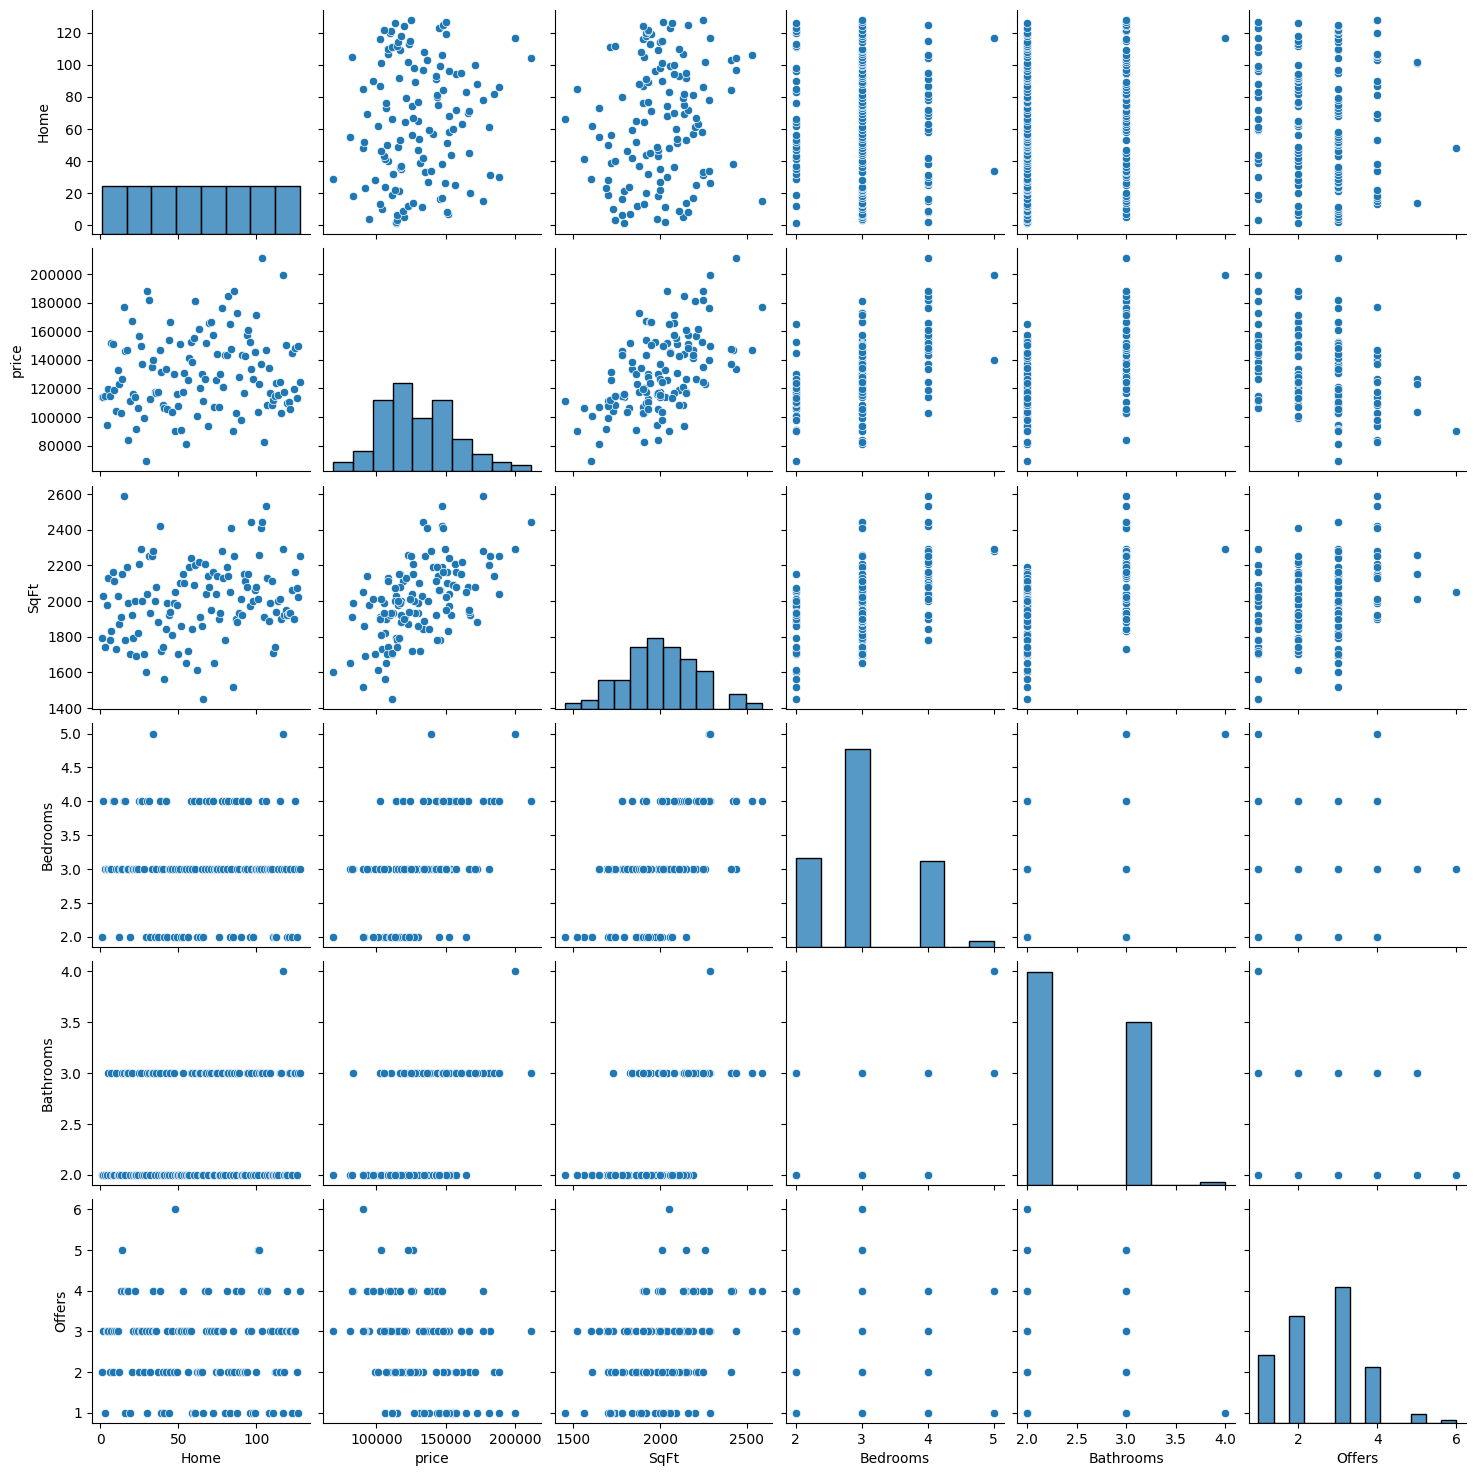

In [11]:
# Resumen estadístico
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

sns.pairplot(df)
plt.show()


In [17]:


# Separar características y variable objetivo
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]  # Esto ya es un DataFrame
y = df['price']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar que X_train y X_test son DataFrames
print(type(X_train))  # Debería mostrar <class 'pandas.core.frame.DataFrame'>



<class 'pandas.core.frame.DataFrame'>


In [13]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


Coeficientes: [   41.44755181 10278.00910207 13090.39118144]
Intercepto: -16372.916362967415


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred = model.predict(X_test)

# Cálculo del MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R²:", r2)


Mean Squared Error (MSE): 320149938.2302678
R²: 0.45681957775488835


In [15]:
# Nueva casa
new_house = [[2000, 3, 2]]

# Predicción
predicted_price = model.predict(new_house)
print("Precio predicho para la nueva casa:", predicted_price[0])


Precio predicho para la nueva casa: 123536.9969321844


c:\Users\feded\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
